# Image classification using Convolutional Neural Networks

## Step 1 : Importing essential python libraries

In [1]:
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
tf.__version__

'2.3.1'

## Step 2 : Data-preprocessing

### Pre-processing training set

In [3]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
                'Training',
                target_size = (64, 64),
                batch_size = 32,
                class_mode = 'binary')

Found 47009 images belonging to 2 classes.


### Pre-processing test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
                'Validation',
                target_size = (64, 64),
                batch_size = 32,
                class_mode = 'binary')

Found 11649 images belonging to 2 classes.


## Step 3 : Building the Convolutional Neural Network model

In [5]:
# Step 1 : Initializing the CNN as a sequence of layers
cnn = tf.keras.models.Sequential()

# Step 2 : Convolutional Block
## Set 1 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

## Set 2 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

## Set 3 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# Step 3 : Flattening
cnn.add(tf.keras.layers.Flatten())

# step 4 : Artificial Neural Network
## Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

## Output layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

## Step 4 : Training the CNN model

### Compiling the model

In [6]:
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0, reduction="auto", name="binary_crossentropy"), metrics = ['accuracy'])

### Training the model on training set and evaluating on the test set

In [7]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
1470/1470 [==============================] - 156s 106ms/step - loss: 0.3125 - accuracy: 0.8597 - val_loss: 0.1522 - val_accuracy: 0.9422
Epoch 2/30
1470/1470 [==============================] - 147s 100ms/step - loss: 0.1863 - accuracy: 0.9304 - val_loss: 0.1258 - val_accuracy: 0.9531
Epoch 3/30
1470/1470 [==============================] - 149s 101ms/step - loss: 0.1643 - accuracy: 0.9408 - val_loss: 0.1258 - val_accuracy: 0.9537
Epoch 4/30
1470/1470 [==============================] - 154s 105ms/step - loss: 0.1661 - accuracy: 0.9393 - val_loss: 0.1268 - val_accuracy: 0.9515
Epoch 5/30
1470/1470 [==============================] - 147s 100ms/step - loss: 0.1512 - accuracy: 0.9458 - val_loss: 0.1143 - val_accuracy: 0.9591
Epoch 6/30
1470/1470 [==============================] - 259s 176ms/step - loss: 0.1462 - accuracy: 0.9470 - val_loss: 0.1236 - val_accuracy: 0.9547
Epoch 7/30
1470/1470 [==============================] - 158s 108ms/step - loss: 0.1420 - accuracy: 0.9479 - val_

## Step 5 : Visualizing the results

### Accuracy

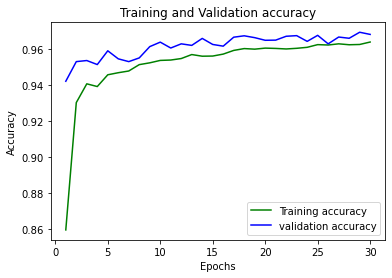

In [8]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss

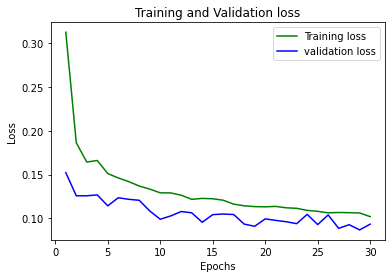

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Step 6 : Single Prediction

In [10]:
training_set.class_indices

{'female': 0, 'male': 1}

### Female

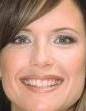

In [11]:
PIL.Image.open('single_pred/124075.jpg.jpg')

In [12]:
female_img = image.load_img('single_pred/124075.jpg.jpg', target_size = (64, 64))
female_img = image.img_to_array(female_img)
female_img = np.expand_dims(female_img, axis = 0)
result = cnn.predict(female_img)
if result[0][0] > 0.5:
  prediction = 'male'
else:
  prediction = 'female'
print(prediction)

female


### Male

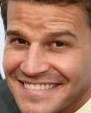

In [13]:
PIL.Image.open('single_pred/077297.jpg.jpg')

In [15]:
male_img = image.load_img('single_pred/077297.jpg.jpg', target_size = (64, 64))
male_img = image.img_to_array(male_img)
male_img = np.expand_dims(male_img, axis = 0)
result = cnn.predict(male_img)
if result[0][0] > 0.5:
  prediction = 'male'
else:
  prediction = 'female'
print(prediction)

male


## Step 7 : Saving the model

In [16]:
cnn.save('MaleVsFemale_model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: MaleVsFemale_model_1\assets


In [18]:
from keras.models import load_model
classifier = load_model('MaleVsFemale_model_1')

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0